In [73]:
import pandas as pd
import numpy as np
import requests
import json
# from 4/4/22 0:00 UTC to 6/20/22 0:00 UTC 
pd.set_option("display.precision", 15)
#df.index.name='Index1' = to give index a name 
#/markets/GMT-PERP/candles?resolution={resolution}&start_time={start_time}&end_time={end_time}
market = requests.get('https://ftx.com/api/markets/BTC-PERP/candles?resolution=3600&start_time=1649116800&end_time=1655683200').json()
df = pd.DataFrame(market['result'])

some_variable = df.loc[0:50]
print(some_variable)
df 

                    startTime             time     open     high      low  \
0   2022-04-18T12:00:00+00:00  1650283200000.0  39007.0  39499.0  39007.0   
1   2022-04-18T13:00:00+00:00  1650286800000.0  39401.0  39620.0  39228.0   
2   2022-04-18T14:00:00+00:00  1650290400000.0  39328.0  39580.0  39307.0   
3   2022-04-18T15:00:00+00:00  1650294000000.0  39350.0  39379.0  39127.0   
4   2022-04-18T16:00:00+00:00  1650297600000.0  39256.0  39705.0  39050.0   
5   2022-04-18T17:00:00+00:00  1650301200000.0  39476.0  40450.0  39471.0   
6   2022-04-18T18:00:00+00:00  1650304800000.0  40225.0  41152.0  40214.0   
7   2022-04-18T19:00:00+00:00  1650308400000.0  40657.0  40780.0  40426.0   
8   2022-04-18T20:00:00+00:00  1650312000000.0  40699.0  40923.0  40649.0   
9   2022-04-18T21:00:00+00:00  1650315600000.0  40676.0  41118.0  40676.0   
10  2022-04-18T22:00:00+00:00  1650319200000.0  40814.0  40945.0  40711.0   
11  2022-04-18T23:00:00+00:00  1650322800000.0  40929.0  40979.0  40729.0   

,startTime,time,open,high,low,close,volume
0,2022-04-18T12:00:00+00:00,1650283200000.0,39007.0,39499.0,39007.0,39401.0,1.716092889200000e+08
1,2022-04-18T13:00:00+00:00,1650286800000.0,39401.0,39620.0,39228.0,39328.0,2.320193295547000e+08
2,2022-04-18T14:00:00+00:00,1650290400000.0,39328.0,39580.0,39307.0,39350.0,1.599606928636000e+08
3,2022-04-18T15:00:00+00:00,1650294000000.0,39350.0,39379.0,39127.0,39256.0,1.041074209005000e+08
4,2022-04-18T16:00:00+00:00,1650297600000.0,39256.0,39705.0,39050.0,39476.0,1.603407003363000e+08
...,...,...,...,...,...,...,...
1496,2022-06-19T20:00:00+00:00,1655668800000.0,20098.0,20710.0,20026.0,20624.0,3.592597359075000e+08
1497,2022-06-19T21:00:00+00:00,1655672400000.0,20625.0,20644.0,20262.0,20380.0,1.160296189448000e+08
1498,2022-06-19T22:00:00+00:00,1655676000000.0,20380.0,20800.0,20288.0,20672.0,2.373076309552000e+08
1499,2022-06-19T23:00:00+00:00,1655679600000.0,20672.0,20695.0,20389.0,20534.0,9.061728980190000e+07


In [74]:
#Group by hour and take the mean prices of all hours 
#1st trial
#s = pd.date_range('2022-04-05T00:00:00+00:00', '2022-05-23T00:00:00+00:00', freq='h').to_series()
#s.dt.dayofweek.head(50)
#s.head(50)
###########
#2nd trial 
s = pd.date_range('2022-04-05', '2022-05-23', freq='h').to_series()
s.dt.hour

2022-04-05 00:00:00     0
2022-04-05 01:00:00     1
2022-04-05 02:00:00     2
2022-04-05 03:00:00     3
2022-04-05 04:00:00     4
                       ..
2022-05-22 20:00:00    20
2022-05-22 21:00:00    21
2022-05-22 22:00:00    22
2022-05-22 23:00:00    23
2022-05-23 00:00:00     0
Freq: H, Length: 1153, dtype: int64

In [75]:
df['hourOfDay'] = pd.to_datetime(df['startTime']).dt.hour
print(df.hourOfDay)
hourOfDay = df['hourOfDay'] = pd.to_datetime(df['startTime']).dt.hour
#disregard this 

0       12
1       13
2       14
3       15
4       16
        ..
1496    20
1497    21
1498    22
1499    23
1500     0
Name: hourOfDay, Length: 1501, dtype: int64


In [76]:
# 1- Define the difference 
df['Difference'] = df['high'] - df['low']
print(df.Difference)

0       492.0
1       392.0
2       273.0
3       252.0
4       655.0
        ...  
1496    684.0
1497    382.0
1498    512.0
1499    306.0
1500    603.0
Name: Difference, Length: 1501, dtype: float64


In [77]:
#2- Make a dataframe from diff & hour
df1 = pd.DataFrame(df, columns=['Difference', 'hourOfDay'])
df1['hourOfDay'] = df['hourOfDay']
print(df1.head(30))

    Difference  hourOfDay
0        492.0         12
1        392.0         13
2        273.0         14
3        252.0         15
4        655.0         16
5        979.0         17
6        938.0         18
7        354.0         19
8        274.0         20
9        442.0         21
10       234.0         22
11       250.0         23
12       491.0          0
13       223.0          1
14       163.0          2
15       189.0          3
16       222.0          4
17       225.0          5
18       144.0          6
19       178.0          7
20       191.0          8
21       196.0          9
22       184.0         10
23       388.0         11
24       451.0         12
25       621.0         13
26       300.0         14
27       431.0         15
28       322.0         16
29       207.0         17


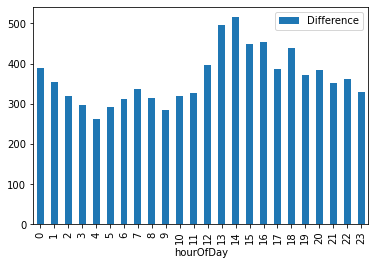

In [78]:
import matplotlib.pyplot as plt
# 3- Show the mean Of Every hour in relation to its corresponding Difference
df1.groupby('hourOfDay').mean().plot(kind='bar')
plt.show()
df1_mean_diff = df1.groupby('hourOfDay').mean()

In [79]:
df1_mean_diff.loc[df1_mean_diff['Difference'].idxmax()]

Difference    516.190476190476147
Name: 14, dtype: float64

In [80]:
df1_mean_diff.loc[df1_mean_diff['Difference'].idxmin()]

Difference    261.580645161290306
Name: 4, dtype: float64

In [81]:
# 4- show the highs in All hours 
df3 = pd.DataFrame(df, columns=['high', 'hourOfDay'])
df3['hourOfDay'] = df['hourOfDay']
print(df3.head(30))

       high  hourOfDay
0   39499.0         12
1   39620.0         13
2   39580.0         14
3   39379.0         15
4   39705.0         16
5   40450.0         17
6   41152.0         18
7   40780.0         19
8   40923.0         20
9   41118.0         21
10  40945.0         22
11  40979.0         23
12  41292.0          0
13  40940.0          1
14  40774.0          2
15  40806.0          3
16  40886.0          4
17  40877.0          5
18  40807.0          6
19  40751.0          7
20  40859.0          8
21  40773.0          9
22  40827.0         10
23  41060.0         11
24  41118.0         12
25  41477.0         13
26  41700.0         14
27  41820.0         15
28  41566.0         16
29  41385.0         17


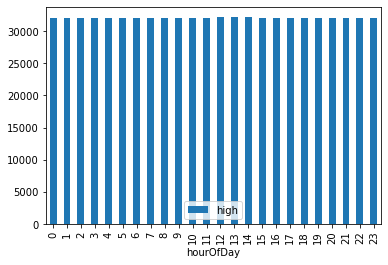

                            high
hourOfDay                       
0          31992.079365079363924
1          32120.387096774193196
2          32074.338709677420411
3          32063.903225806450791
4          32022.258064516128798
5          32061.629032258064399
6          32060.532258064515190
7          32052.403225806450791
8          32055.129032258064399
9          32019.983870967742405
10         32052.225806451613607
11         32057.758064516128798
12         32204.587301587300317
13         32211.396825396826898
14         32177.650793650795094
15         32126.015873015872785
16         32086.761904761904589
17         31996.952380952381645
18         32006.444444444445253
19         31977.777777777777374
20         31980.126984126985917
21         32005.158730158731487
22         32014.777777777777374
23         31978.539682539681962


In [82]:
df3.groupby('hourOfDay').mean().plot(kind='bar')
plt.show()
df3_mean_hr = df3.groupby('hourOfDay').mean()
print(df3.groupby('hourOfDay').mean())

In [83]:
df3_mean_hr.describe()

# hr 3 = max high 

,high
count,24.000000000000000
mean,32058.284092848607543
std,67.887325908449327
min,31977.777777777777374
25%,32006.123015873017721
50%,32053.766129032257595
75%,32077.444508448541455
max,32211.396825396826898


In [84]:
df3_mean_hr.loc[df3_mean_hr['high'].idxmax()]

high    32211.396825396826898
Name: 13, dtype: float64

In [85]:
df3_mean_hr.loc[df3_mean_hr['high'].idxmin()]

high    31977.777777777777374
Name: 19, dtype: float64

In [86]:
#5- show the close in all hrs 
df4 = pd.DataFrame(df, columns=['close', 'hourOfDay'])
df4['hourOfDay'] = df['hourOfDay']
print(df4.head(30))

      close  hourOfDay
0   39401.0         12
1   39328.0         13
2   39350.0         14
3   39256.0         15
4   39476.0         16
5   40225.0         17
6   40657.0         18
7   40699.0         19
8   40676.0         20
9   40814.0         21
10  40929.0         22
11  40812.0         23
12  40886.0          0
13  40756.0          1
14  40625.0          2
15  40697.0          3
16  40863.0          4
17  40673.0          5
18  40717.0          6
19  40686.0          7
20  40730.0          8
21  40664.0          9
22  40805.0         10
23  40692.0         11
24  40987.0         12
25  41464.0         13
26  41585.0         14
27  41468.0         15
28  41360.0         16
29  41365.0         17


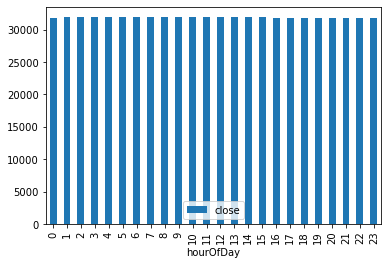

                           close
hourOfDay                       
0          31774.000000000000000
1          31912.645161290321994
2          31915.612903225806804
3          31904.612903225806804
4          31887.725806451613607
5          31908.500000000000000
6          31879.483870967742405
7          31899.887096774193196
8          31883.500000000000000
9          31875.693548387098417
10         31905.258064516128798
11         31893.306451612901583
12         31957.111111111109494
13         31955.253968253968196
14         31898.095238095236709
15         31881.190476190477057
16         31845.158730158731487
17         31789.523809523809177
18         31790.095238095236709
19         31772.111111111109494
20         31784.158730158731487
21         31830.968253968254430
22         31831.047619047618355
23         31784.301587301586551


In [87]:
df4.groupby('hourOfDay').mean().plot(kind='bar')
plt.show()
df4_mean_hr = df4.groupby('hourOfDay').mean()
print(df4.groupby('hourOfDay').mean())

In [88]:
df4_mean_hr.describe()
# max close = hr 5 
# min close =  20
df4_mean_hr.loc[df4_mean_hr['close'].idxmax()]

close    31957.111111111109494
Name: 12, dtype: float64

In [89]:
df4_mean_hr.loc[df4_mean_hr['close'].idxmin()]

close    31772.111111111109494
Name: 19, dtype: float64

In [90]:
#6- open price mean by hour 
df5 = pd.DataFrame(df, columns=['open', 'hourOfDay'])
df5['hourOfDay'] = df['hourOfDay']

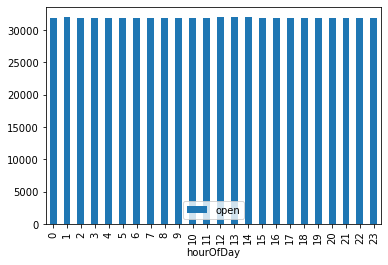

                           close
hourOfDay                       
0          31774.000000000000000
1          31912.645161290321994
2          31915.612903225806804
3          31904.612903225806804
4          31887.725806451613607
5          31908.500000000000000
6          31879.483870967742405
7          31899.887096774193196
8          31883.500000000000000
9          31875.693548387098417
10         31905.258064516128798
11         31893.306451612901583
12         31957.111111111109494
13         31955.253968253968196
14         31898.095238095236709
15         31881.190476190477057
16         31845.158730158731487
17         31789.523809523809177
18         31790.095238095236709
19         31772.111111111109494
20         31784.158730158731487
21         31830.968253968254430
22         31831.047619047618355
23         31784.301587301586551


In [91]:
df5.groupby('hourOfDay').mean().plot(kind='bar')
plt.show()
df5_mean_hr = df5.groupby('hourOfDay').mean()
print(df4.groupby('hourOfDay').mean())

In [92]:
df5_mean_hr.loc[df5_mean_hr['open'].idxmax()]

open    32006.285714285713766
Name: 12, dtype: float64

In [93]:
df5_mean_hr.loc[df5_mean_hr['open'].idxmin()]

open    31773.015873015872785
Name: 20, dtype: float64

In [94]:
#7- Open - close 
df['Difference_oc'] = df['open'] - df['close']
print(df.Difference)

0       492.0
1       392.0
2       273.0
3       252.0
4       655.0
        ...  
1496    684.0
1497    382.0
1498    512.0
1499    306.0
1500    603.0
Name: Difference, Length: 1501, dtype: float64


In [95]:
df6 = pd.DataFrame(df, columns=['Difference_oc', 'hourOfDay'])
df6['hourOfDay'] = df['hourOfDay']
print(df6.head(30))

    Difference_oc  hourOfDay
0          -394.0         12
1            73.0         13
2           -22.0         14
3            94.0         15
4          -220.0         16
5          -749.0         17
6          -432.0         18
7           -42.0         19
8            23.0         20
9          -138.0         21
10         -115.0         22
11          117.0         23
12          -74.0          0
13          130.0          1
14          131.0          2
15          -72.0          3
16         -166.0          4
17          190.0          5
18          -44.0          6
19           31.0          7
20          -44.0          8
21           66.0          9
22         -141.0         10
23          113.0         11
24         -295.0         12
25         -477.0         13
26         -121.0         14
27          117.0         15
28          108.0         16
29           -5.0         17


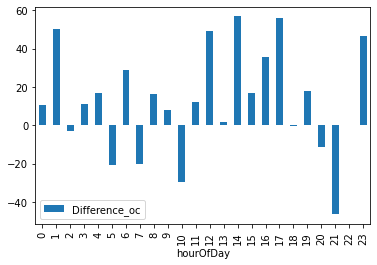

                Difference_oc
hourOfDay                    
0          10.380952380952381
1          50.532258064516128
2          -3.225806451612903
3          11.064516129032258
4          16.709677419354840
5         -20.709677419354840
6          29.048387096774192
7         -19.983870967741936
8          16.322580645161292
9           8.064516129032258
10        -29.661290322580644
11         11.967741935483870
12         49.174603174603178
13          1.698412698412698
14         56.809523809523810
15         16.904761904761905
16         35.746031746031747
17         55.888888888888886
18         -0.507936507936508
19         18.111111111111111
20        -11.142857142857142
21        -46.428571428571431
22         -0.111111111111111
23         46.809523809523810


In [96]:
df6.groupby('hourOfDay').mean().plot(kind='bar')
plt.show()
df6_mean_hr = df6.groupby('hourOfDay').mean()
print(df6.groupby('hourOfDay').mean())

In [97]:
df6_mean_hr.loc[df6_mean_hr['Difference_oc'].idxmax()]

Difference_oc    56.80952380952381
Name: 14, dtype: float64

In [98]:
df6_mean_hr.loc[df6_mean_hr['Difference_oc'].idxmin()]

Difference_oc   -46.428571428571431
Name: 21, dtype: float64

In [99]:
#-8 Volume by hour 
df7 = pd.DataFrame(df, columns=['volume', 'hourOfDay'])
df7['hourOfDay'] = df['hourOfDay']
print(df7.head(30))

                   volume  hourOfDay
0   1.716092889200000e+08         12
1   2.320193295547000e+08         13
2   1.599606928636000e+08         14
3   1.041074209005000e+08         15
4   1.603407003363000e+08         16
5   5.785078154880000e+08         17
6   5.130203140451000e+08         18
7   1.592047399134000e+08         19
8   1.071630522665000e+08         20
9   1.025907778546000e+08         21
10  5.386418232970000e+07         22
11  7.411736806680000e+07         23
12  1.900425975502000e+08          0
13  5.391941298580000e+07          1
14  6.844599780640000e+07          2
15  5.334799070430000e+07          3
16  4.039309920260000e+07          4
17  2.965805629790000e+07          5
18  2.654811561620000e+07          6
19  4.094509222080000e+07          7
20  4.509283859000000e+07          8
21  5.177735923620000e+07          9
22  5.344474059630000e+07         10
23  8.885523218470000e+07         11
24  1.134778229953000e+08         12
25  2.607914331461000e+08         13
2

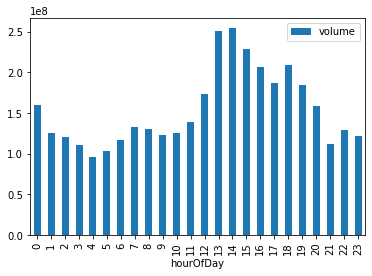

                          volume
hourOfDay                       
0          1.594462326409492e+08
1          1.253313938123871e+08
2          1.205241782545145e+08
3          1.101625923986194e+08
4          9.599297134906130e+07
5          1.027844373765436e+08
6          1.163326621349548e+08
7          1.330224962562984e+08
8          1.302142715438645e+08
9          1.229323307886645e+08
10         1.256320030368403e+08
11         1.395089801348226e+08
12         1.733968225669746e+08
13         2.511122257483587e+08
14         2.546855645607445e+08
15         2.292252222093810e+08
16         2.063438855514683e+08
17         1.869262712652206e+08
18         2.096229881311397e+08
19         1.845560087089730e+08
20         1.593194105000476e+08
21         1.123674118098667e+08
22         1.294367884121841e+08
23         1.221858864917175e+08


In [100]:
df7.groupby('hourOfDay').mean().plot(kind='bar')
plt.show()
df7_mean_hr = df7.groupby('hourOfDay').mean()
print(df7.groupby('hourOfDay').mean())

In [101]:
df7_mean_hr.loc[df7_mean_hr['volume'].idxmax()]

volume    2.546855645607445e+08
Name: 14, dtype: float64

In [102]:
df7_mean_hr.loc[df7_mean_hr['volume'].idxmin()]

volume    9.599297134906130e+07
Name: 4, dtype: float64

In [103]:
#9- find low of the week's hour 
df8 = pd.DataFrame(df, columns=['low', 'hourOfDay'])
df8['hourOfDay'] = df['hourOfDay']

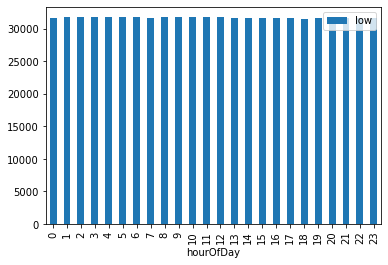

                             low
hourOfDay                       
0          31603.428571428572468
1          31766.322580645162816
2          31755.032258064515190
3          31766.290322580643988
4          31760.677419354837184
5          31770.548387096772785
6          31747.693548387098417
7          31716.467741935484810
8          31741.629032258064399
9          31734.709677419356012
10         31732.370967741935601
11         31731.112903225806804
12         31807.539682539681962
13         31716.047619047618355
14         31661.460317460318038
15         31678.015873015872785
16         31633.444444444445253
17         31610.666666666667879
18         31566.825396825395728
19         31605.412698412699683
20         31596.444444444445253
21         31652.825396825395728
22         31652.142857142858702
23         31650.412698412699683


In [104]:
df8.groupby('hourOfDay').mean().plot(kind='bar')
plt.show()
df8_mean_hr = df8.groupby('hourOfDay').mean()
print(df8.groupby('hourOfDay').mean())

In [105]:
df8_mean_hr.loc[df8_mean_hr['low'].idxmax()]

low    31807.539682539681962
Name: 12, dtype: float64

In [106]:
df8_mean_hr.loc[df8_mean_hr['low'].idxmin()]

low    31566.825396825395728
Name: 18, dtype: float64

In [145]:
#9- Highest hour on monday 

d = pd.date_range('2022-04-05', '2022-05-23', freq='D').to_series()
d.dt.dayofweek

df_week_days = d.dt.dayofweek.tolist()
print(df_week_days)


days["days"] = d.dt.dayofweek.astype(dtype='int32', copy=True, errors='raise')
days["days"]

[1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0]


NameError: name 'days' is not defined

In [108]:
df['days'] = pd.to_datetime(df['startTime']).dt.dayofweek
df.days.tail(70)
d = {'col1': df['days']}
d
#disregard this 

{'col1': 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 1496    6
 1497    6
 1498    6
 1499    6
 1500    0
 Name: days, Length: 1501, dtype: int64}

In [109]:
dfd = pd.DataFrame({'week_of_day':days})
print(dfd)

NameError: name 'days' is not defined

In [110]:
dfh = pd.DataFrame({'hour':hourOfDay})
print(dfh)

      hour
0       12
1       13
2       14
3       15
4       16
...    ...
1496    20
1497    21
1498    22
1499    23
1500     0

[1501 rows x 1 columns]


In [147]:
#specify monday : 

byday = df.loc[df['days'] == 0]
byday.head(50)

,startTime,time,open,high,low,close,volume,hourOfDay,Difference,Difference_oc,days
0,2022-04-18T12:00:00+00:00,1650283200000.0,39007.0,39499.0,39007.0,39401.0,1.716092889200000e+08,12,492.0,-394.0,0
1,2022-04-18T13:00:00+00:00,1650286800000.0,39401.0,39620.0,39228.0,39328.0,2.320193295547000e+08,13,392.0,73.0,0
2,2022-04-18T14:00:00+00:00,1650290400000.0,39328.0,39580.0,39307.0,39350.0,1.599606928636000e+08,14,273.0,-22.0,0
3,2022-04-18T15:00:00+00:00,1650294000000.0,39350.0,39379.0,39127.0,39256.0,1.041074209005000e+08,15,252.0,94.0,0
4,2022-04-18T16:00:00+00:00,1650297600000.0,39256.0,39705.0,39050.0,39476.0,1.603407003363000e+08,16,655.0,-220.0,0
5,2022-04-18T17:00:00+00:00,1650301200000.0,39476.0,40450.0,39471.0,40225.0,5.785078154880000e+08,17,979.0,-749.0,0
6,2022-04-18T18:00:00+00:00,1650304800000.0,40225.0,41152.0,40214.0,40657.0,5.130203140451000e+08,18,938.0,-432.0,0
7,2022-04-18T19:00:00+00:00,1650308400000.0,40657.0,40780.0,40426.0,40699.0,1.592047399134000e+08,19,354.0,-42.0,0
8,2022-04-18T20:00:00+00:00,1650312000000.0,40699.0,40923.0,40649.0,40676.0,1.071630522665000e+08,20,274.0,23.0,0
9,2022-04-18T21:00:00+00:00,1650315600000.0,40676.0,41118.0,40676.0,40814.0,1.025907778546000e+08,21,442.0,-138.0,0


In [112]:
by_day_data = byday.groupby('hourOfDay').mean()
by_day_data

,time,open,high,low,close,volume,Difference,Difference_oc,days
hourOfDay,,,,,,,,,
0,1653264000000.0,31106.666666666667879,31303.222222222222626,30859.444444444445253,30994.000000000000000,1.902500720645778e+08,443.777777777777771,112.666666666666671,0.0
1,1652965200000.0,32363.125000000000000,32582.250000000000000,32156.875000000000000,32367.625000000000000,1.681398123744125e+08,425.375000000000000,-4.500000000000000,0.0
2,1652968800000.0,32367.625000000000000,32516.500000000000000,32102.625000000000000,32279.375000000000000,2.090879694998500e+08,413.875000000000000,88.250000000000000,0.0
3,1652972400000.0,32279.375000000000000,32478.875000000000000,32166.250000000000000,32372.000000000000000,1.795486035216500e+08,312.625000000000000,-92.625000000000000,0.0
4,1652976000000.0,32371.750000000000000,32605.625000000000000,32255.875000000000000,32383.875000000000000,1.503680600962500e+08,349.750000000000000,-12.125000000000000,0.0
5,1652979600000.0,32384.000000000000000,32541.625000000000000,32272.375000000000000,32355.500000000000000,1.236326764201625e+08,269.250000000000000,28.500000000000000,0.0
6,1652983200000.0,32355.750000000000000,32594.625000000000000,32128.500000000000000,32301.750000000000000,2.030049223060375e+08,466.125000000000000,54.000000000000000,0.0
7,1652986800000.0,32302.000000000000000,32426.375000000000000,32050.875000000000000,32192.250000000000000,1.869888772401750e+08,375.500000000000000,109.750000000000000,0.0
8,1652990400000.0,32192.250000000000000,32354.250000000000000,32004.250000000000000,32179.875000000000000,1.927834705223000e+08,350.000000000000000,12.375000000000000,0.0


In [113]:
df_high = pd.DataFrame(byday, columns=['high', 'hourOfDay'])
print(df_high.head(30))

        high  hourOfDay
0    39499.0         12
1    39620.0         13
2    39580.0         14
3    39379.0         15
4    39705.0         16
5    40450.0         17
6    41152.0         18
7    40780.0         19
8    40923.0         20
9    41118.0         21
10   40945.0         22
11   40979.0         23
156  39550.0          0
157  39159.0          1
158  39170.0          2
159  39289.0          3
160  39253.0          4
161  39231.0          5
162  39071.0          6
163  38674.0          7
164  38591.0          8
165  38644.0          9
166  38663.0         10
167  38969.0         11
168  39042.0         12
169  39324.0         13
170  39435.0         14
171  39388.0         15
172  39686.0         16
173  39589.0         17


In [114]:
df_high_mean_day = df_high.groupby('hourOfDay').mean()
print(df_high_mean_day.groupby('hourOfDay').mean())

                            high
hourOfDay                       
0          31303.222222222222626
1          32582.250000000000000
2          32516.500000000000000
3          32478.875000000000000
4          32605.625000000000000
5          32541.625000000000000
6          32594.625000000000000
7          32426.375000000000000
8          32354.250000000000000
9          32328.000000000000000
10         32296.000000000000000
11         32252.875000000000000
12         33109.888888888890506
13         33132.111111111109494
14         33061.000000000000000
15         32908.777777777781012
16         33056.555555555554747
17         32941.333333333335759
18         33049.777777777781012
19         32941.111111111109494
20         33096.888888888890506
21         33172.777777777781012
22         33102.888888888890506
23         32970.111111111109494


In [115]:
df_high_mean_day.loc[df_high_mean_day['high'].idxmax()]

high    33172.777777777781012
Name: 21, dtype: float64

In [116]:
df_high_mean_day.loc[df_high_mean_day['high'].idxmin()]

high    31303.222222222222626
Name: 0, dtype: float64

In [117]:
# lowest hour on monday 

df_low = pd.DataFrame(byday, columns=['low', 'hourOfDay'])
print(df_low.head(30))

         low  hourOfDay
0    39007.0         12
1    39228.0         13
2    39307.0         14
3    39127.0         15
4    39050.0         16
5    39471.0         17
6    40214.0         18
7    40426.0         19
8    40649.0         20
9    40676.0         21
10   40711.0         22
11   40729.0         23
156  38679.0          0
157  38762.0          1
158  38966.0          2
159  39092.0          3
160  39070.0          4
161  38949.0          5
162  38585.0          6
163  38151.0          7
164  38382.0          8
165  38205.0          9
166  38405.0         10
167  38352.0         11
168  38752.0         12
169  38636.0         13
170  38634.0         14
171  38931.0         15
172  38924.0         16
173  39368.0         17


In [118]:
df_low_mean = df_low.groupby('hourOfDay').mean()
print(df_low_mean)

                             low
hourOfDay                       
0          30859.444444444445253
1          32156.875000000000000
2          32102.625000000000000
3          32166.250000000000000
4          32255.875000000000000
5          32272.375000000000000
6          32128.500000000000000
7          32050.875000000000000
8          32004.250000000000000
9          31972.875000000000000
10         31891.500000000000000
11         31871.375000000000000
12         32681.888888888890506
13         32572.333333333332121
14         32513.000000000000000
15         32482.444444444445253
16         32453.000000000000000
17         32419.222222222222626
18         32498.000000000000000
19         32461.444444444445253
20         32566.666666666667879
21         32709.333333333332121
22         32713.777777777777374
23         32541.000000000000000


In [119]:
df_low_mean.loc[df_low_mean['low'].idxmax()]

low    32713.777777777777374
Name: 22, dtype: float64

In [120]:
df_low_mean.loc[df_low_mean['low'].idxmin()]

low    30859.444444444445253
Name: 0, dtype: float64

In [121]:
# Open price on monday 
df_open = pd.DataFrame(byday, columns=['open', 'hourOfDay'])
print(df_open.head(30))

        open  hourOfDay
0    39007.0         12
1    39401.0         13
2    39328.0         14
3    39350.0         15
4    39256.0         16
5    39476.0         17
6    40225.0         18
7    40657.0         19
8    40699.0         20
9    40676.0         21
10   40814.0         22
11   40929.0         23
156  39453.0          0
157  38878.0          1
158  39107.0          2
159  39098.0          3
160  39245.0          4
161  39147.0          5
162  38974.0          6
163  38640.0          7
164  38455.0          8
165  38429.0          9
166  38592.0         10
167  38435.0         11
168  38840.0         12
169  38814.0         13
170  38740.0         14
171  39074.0         15
172  38984.0         16
173  39483.0         17


In [122]:
df_open_mean = df_open.groupby('hourOfDay').mean()
print(df_open.groupby('hourOfDay').mean())

                            open
hourOfDay                       
0          31106.666666666667879
1          32363.125000000000000
2          32367.625000000000000
3          32279.375000000000000
4          32371.750000000000000
5          32384.000000000000000
6          32355.750000000000000
7          32302.000000000000000
8          32192.250000000000000
9          32180.375000000000000
10         32127.625000000000000
11         32071.250000000000000
12         32834.444444444445253
13         32818.666666666664241
14         32820.111111111109494
15         32676.888888888890506
16         32740.444444444445253
17         32704.222222222222626
18         32729.555555555554747
19         32736.777777777777374
20         32706.444444444445253
21         32808.888888888890506
22         32921.444444444445253
23         32871.000000000000000


In [123]:
df_open_mean.loc[df_open_mean['open'].idxmax()]

open    32921.444444444445253
Name: 22, dtype: float64

In [124]:
df_open_mean.loc[df_open_mean['open'].idxmin()]

open    31106.666666666667879
Name: 0, dtype: float64

In [125]:
# close hours 
df_close = pd.DataFrame(byday, columns=['close', 'hourOfDay'])
print(df_close.head(30))


       close  hourOfDay
0    39401.0         12
1    39328.0         13
2    39350.0         14
3    39256.0         15
4    39476.0         16
5    40225.0         17
6    40657.0         18
7    40699.0         19
8    40676.0         20
9    40814.0         21
10   40929.0         22
11   40812.0         23
156  38878.0          0
157  39107.0          1
158  39098.0          2
159  39245.0          3
160  39146.0          4
161  38974.0          5
162  38640.0          6
163  38455.0          7
164  38429.0          8
165  38592.0          9
166  38435.0         10
167  38840.0         11
168  38814.0         12
169  38740.0         13
170  39074.0         14
171  38985.0         15
172  39483.0         16
173  39417.0         17


In [126]:
df_close_mean = df_close.groupby('hourOfDay').mean()
print(df_close.groupby('hourOfDay').mean())

                           close
hourOfDay                       
0          30994.000000000000000
1          32367.625000000000000
2          32279.375000000000000
3          32372.000000000000000
4          32383.875000000000000
5          32355.500000000000000
6          32301.750000000000000
7          32192.250000000000000
8          32179.875000000000000
9          32128.125000000000000
10         32071.000000000000000
11         32062.625000000000000
12         32818.777777777781012
13         32820.555555555554747
14         32676.666666666667879
15         32740.555555555554747
16         32704.444444444445253
17         32729.111111111109494
18         32736.888888888890506
19         32698.888888888890506
20         32808.888888888890506
21         32921.444444444445253
22         32871.000000000000000
23         32700.222222222222626


In [127]:
df_close_mean.loc[df_close_mean['close'].idxmax()]

close    32921.444444444445253
Name: 21, dtype: float64

In [128]:
df_close_mean.loc[df_close_mean['close'].idxmin()]

close    30994.0
Name: 0, dtype: float64

In [129]:
#specify tuesday : 

byday1 = df.loc[df['days'] == 1]
byday1.tail(50)

,startTime,time,open,high,low,close,volume,hourOfDay,Difference,Difference_oc,days
1042,2022-05-31T22:00:00+00:00,1654034400000.0,31703.0,31871.0,31669.0,31846.0,4.586212387890000e+07,22,202.0,-143.0,1
1043,2022-05-31T23:00:00+00:00,1654038000000.0,31846.0,31918.0,31756.0,31782.0,5.321282896850000e+07,23,162.0,64.0,1
1188,2022-06-07T00:00:00+00:00,1654560000000.0,31359.0,31373.0,30092.0,30168.0,7.711712075259000e+08,0,1281.0,1191.0,1
1189,2022-06-07T01:00:00+00:00,1654563600000.0,30164.0,30234.0,29301.0,29544.0,5.129860440600000e+08,1,933.0,620.0,1
1190,2022-06-07T02:00:00+00:00,1654567200000.0,29544.0,29549.0,29163.0,29367.0,3.844376262953000e+08,2,386.0,177.0,1
1191,2022-06-07T03:00:00+00:00,1654570800000.0,29367.0,29637.0,29300.0,29541.0,2.326280254111000e+08,3,337.0,-174.0,1
1192,2022-06-07T04:00:00+00:00,1654574400000.0,29541.0,29588.0,29430.0,29505.0,1.049660088545000e+08,4,158.0,36.0,1
1193,2022-06-07T05:00:00+00:00,1654578000000.0,29505.0,29609.0,29372.0,29446.0,1.286850634919000e+08,5,237.0,59.0,1
1194,2022-06-07T06:00:00+00:00,1654581600000.0,29446.0,29530.0,29417.0,29492.0,7.854594335360000e+07,6,113.0,-46.0,1
1195,2022-06-07T07:00:00+00:00,1654585200000.0,29492.0,29569.0,29464.0,29556.0,6.445760218690000e+07,7,105.0,-64.0,1


In [130]:
by_day_data1 = byday1.groupby('hourOfDay').mean()
by_day_data1


,time,open,high,low,close,volume,Difference,Difference_oc,days
hourOfDay,,,,,,,,,
0,1652745600000.0,32700.222222222222626,33006.111111111109494,32371.888888888890506,32593.111111111109494,3.094563051277333e+08,634.222222222222172,107.111111111111114,1.0
1,1652749200000.0,32592.555555555554747,32739.444444444445253,32285.444444444445253,32414.666666666667879,2.368014392533556e+08,454.000000000000000,177.888888888888886,1.0
2,1652752800000.0,32415.222222222222626,32642.333333333332121,32288.666666666667879,32492.777777777777374,1.835392006002444e+08,353.666666666666686,-77.555555555555557,1.0
3,1652756400000.0,32492.888888888890506,32756.444444444445253,32391.333333333332121,32602.111111111109494,1.353003555287222e+08,365.111111111111086,-109.222222222222229,1.0
4,1652760000000.0,32602.111111111109494,32786.000000000000000,32494.444444444445253,32663.666666666667879,1.073536075050556e+08,291.555555555555543,-61.555555555555557,1.0
5,1652763600000.0,32663.666666666667879,32980.111111111109494,32572.111111111109494,32795.444444444445253,1.491734918242333e+08,408.000000000000000,-131.777777777777771,1.0
6,1652767200000.0,32795.444444444445253,32956.111111111109494,32668.555555555554747,32797.888888888890506,1.459956940439778e+08,287.555555555555543,-2.444444444444445,1.0
7,1652770800000.0,32800.000000000000000,32924.000000000000000,32628.555555555554747,32797.777777777781012,1.219459614412555e+08,295.444444444444457,2.222222222222222,1.0
8,1652774400000.0,32798.000000000000000,32985.444444444445253,32700.555555555554747,32781.111111111109494,1.139554992912000e+08,284.888888888888914,16.888888888888889,1.0


In [131]:
df_high1 = pd.DataFrame(byday1, columns=['high', 'hourOfDay'])
print(df_high1.head(30))

        high  hourOfDay
12   41292.0          0
13   40940.0          1
14   40774.0          2
15   40806.0          3
16   40886.0          4
17   40877.0          5
18   40807.0          6
19   40751.0          7
20   40859.0          8
21   40773.0          9
22   40827.0         10
23   41060.0         11
24   41118.0         12
25   41477.0         13
26   41700.0         14
27   41820.0         15
28   41566.0         16
29   41385.0         17
30   41514.0         18
31   41558.0         19
32   41427.0         20
33   41383.0         21
34   41483.0         22
35   41542.0         23
180  40790.0          0
181  40646.0          1
182  40622.0          2
183  40664.0          3
184  40647.0          4
185  40719.0          5


In [132]:
df_high_mean_day1 = df_high1.groupby('hourOfDay').mean()
print(df_high_mean_day1.groupby('hourOfDay').mean())

                            high
hourOfDay                       
0          33006.111111111109494
1          32739.444444444445253
2          32642.333333333332121
3          32756.444444444445253
4          32786.000000000000000
5          32980.111111111109494
6          32956.111111111109494
7          32924.000000000000000
8          32985.444444444445253
9          32868.666666666664241
10         32806.555555555554747
11         32864.222222222218988
12         32934.111111111109494
13         32990.666666666664241
14         32901.777777777781012
15         32885.000000000000000
16         32794.111111111109494
17         32737.000000000000000
18         32718.666666666667879
19         32758.888888888890506
20         32703.444444444445253
21         32744.222222222222626
22         32661.666666666667879
23         32759.666666666667879


In [133]:
df_high_mean_day1.loc[df_high_mean_day1['high'].idxmax()]

high    33006.111111111109494
Name: 0, dtype: float64

In [134]:
df_high_mean_day1.loc[df_high_mean_day1['high'].idxmin()]

high    32642.333333333332121
Name: 2, dtype: float64

In [135]:
#specify wednsday 
byday2 = df.loc[df['days'] == 2]
byday2.head(50)
byday2.info()
byday2.isnull().values.any() # check for null values 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 36 to 1403
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   startTime      216 non-null    object 
 1   time           216 non-null    float64
 2   open           216 non-null    float64
 3   high           216 non-null    float64
 4   low            216 non-null    float64
 5   close          216 non-null    float64
 6   volume         216 non-null    float64
 7   hourOfDay      216 non-null    int64  
 8   Difference     216 non-null    float64
 9   Difference_oc  216 non-null    float64
 10  days           216 non-null    int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 20.2+ KB


False

In [136]:
by_day_data2 = byday2.groupby('hourOfDay').mean()
by_day_data2

,time,open,high,low,close,volume,Difference,Difference_oc,days
hourOfDay,,,,,,,,,
0,1652832000000.0,32599.000000000000000,32769.888888888890506,32432.666666666667879,32583.222222222222626,1.214531695907111e+08,337.222222222222229,15.777777777777779,2.0
1,1652835600000.0,32583.222222222222626,32718.555555555554747,32419.555555555554747,32587.333333333332121,1.014907686435556e+08,299.000000000000000,-4.111111111111111,2.0
2,1652839200000.0,32587.222222222222626,32785.555555555554747,32477.555555555554747,32687.666666666667879,9.732986879366666e+07,308.000000000000000,-100.444444444444443,2.0
3,1652842800000.0,32687.666666666667879,32767.111111111109494,32352.444444444445253,32437.000000000000000,1.634718194815556e+08,414.666666666666686,250.666666666666657,2.0
4,1652846400000.0,32437.000000000000000,32546.666666666667879,32268.444444444445253,32411.222222222222626,1.377270188552222e+08,278.222222222222229,25.777777777777779,2.0
5,1652850000000.0,32411.555555555554747,32638.666666666667879,32284.777777777777374,32501.888888888890506,1.170662501653111e+08,353.888888888888914,-90.333333333333329,2.0
6,1652853600000.0,32501.888888888890506,32641.666666666667879,32259.111111111109494,32429.555555555554747,1.279686864215000e+08,382.555555555555543,72.333333333333329,2.0
7,1652857200000.0,32429.888888888890506,32629.111111111109494,32223.000000000000000,32438.777777777777374,1.693338945009000e+08,406.111111111111086,-8.888888888888889,2.0
8,1652860800000.0,32438.777777777777374,32670.333333333332121,32244.666666666667879,32531.000000000000000,1.968591592426667e+08,425.666666666666686,-92.222222222222229,2.0


In [137]:
df_high2 = pd.DataFrame(byday2, columns=['high', 'hourOfDay'])
print(df_high2.head(30))

        high  hourOfDay
36   41553.0          0
37   41397.0          1
38   41408.0          2
39   41410.0          3
40   41414.0          4
41   41459.0          5
42   41485.0          6
43   41641.0          7
44   41530.0          8
45   41793.0          9
46   41921.0         10
47   42208.0         11
48   42196.0         12
49   42131.0         13
50   41776.0         14
51   41586.0         15
52   41435.0         16
53   41465.0         17
54   41381.0         18
55   41282.0         19
56   41446.0         20
57   41655.0         21
58   41622.0         22
59   41492.0         23
204  38250.0          0
205  38321.0          1
206  38420.0          2
207  38469.0          3
208  38452.0          4
209  38550.0          5


In [138]:
df_high_mean_day1.loc[df_high_mean_day1['high'].idxmax()]

high    33006.111111111109494
Name: 0, dtype: float64

In [139]:
df_high_mean_day1.loc[df_high_mean_day1['high'].idxmin()]`

high    32642.333333333332121
Name: 2, dtype: float64

In [140]:

byday2 = df.loc[df['days'] == 2]
byday2.tail(50)
by_day_data2 = byday1.groupby('hourOfDay').mean()
by_day_data2

df_high2 = pd.DataFrame(byday2, columns=['high', 'hourOfDay'])
print(df_high1.head(30))

df_high_mean_day2 = df_high2.groupby('hourOfDay').mean()
print(df_high_mean_day2.groupby('hourOfDay').mean())

df_high_mean_day2.loc[df_high_mean_day2['high'].idxmax()]



        high  hourOfDay
12   41292.0          0
13   40940.0          1
14   40774.0          2
15   40806.0          3
16   40886.0          4
17   40877.0          5
18   40807.0          6
19   40751.0          7
20   40859.0          8
21   40773.0          9
22   40827.0         10
23   41060.0         11
24   41118.0         12
25   41477.0         13
26   41700.0         14
27   41820.0         15
28   41566.0         16
29   41385.0         17
30   41514.0         18
31   41558.0         19
32   41427.0         20
33   41383.0         21
34   41483.0         22
35   41542.0         23
180  40790.0          0
181  40646.0          1
182  40622.0          2
183  40664.0          3
184  40647.0          4
185  40719.0          5
                            high
hourOfDay                       
0          32769.888888888890506
1          32718.555555555554747
2          32785.555555555554747
3          32767.111111111109494
4          32546.666666666667879
5          32638.66666666

high    32964.666666666664241
Name: 13, dtype: float64

In [141]:
df_high_mean_day2.loc[df_high_mean_day2['high'].idxmin()]

high    32386.777777777777374
Name: 23, dtype: float64

In [142]:
# SMA over whole period  ====> Fix this 
df_high2_sma = df_high2.rolling(10, min_periods=1).mean()
df_high2_sma

,high,hourOfDay
36,41553.000000000000000,0.0
37,41475.000000000000000,0.5
38,41452.666666666664241,1.0
39,41442.000000000000000,1.5
40,41436.400000000001455,2.0
...,...,...
1399,21624.400000000001455,14.5
1400,21736.200000000000728,15.5
1401,21855.299999999999272,16.5
1402,21980.299999999999272,17.5


In [143]:
# thursday 
byday2 = df.loc[df['days'] == 3]
byday2.head(50)
byday2.info()
byday2.isnull().values.any() # check for null values 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 60 to 1427
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   startTime      216 non-null    object 
 1   time           216 non-null    float64
 2   open           216 non-null    float64
 3   high           216 non-null    float64
 4   low            216 non-null    float64
 5   close          216 non-null    float64
 6   volume         216 non-null    float64
 7   hourOfDay      216 non-null    int64  
 8   Difference     216 non-null    float64
 9   Difference_oc  216 non-null    float64
 10  days           216 non-null    int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 20.2+ KB


False

In [144]:
# loc multiple conditions  , USe this to filter BTC out of weekend to correlate with S&p500 
bydayx=df.loc[(df['days'] != 5) & (df['days'] != 6)]
bydayx.tail(60)

,startTime,time,open,high,low,close,volume,hourOfDay,Difference,Difference_oc,days
1393,2022-06-15T13:00:00+00:00,1655298000000.0,21152.0,21755.0,21112.0,21519.0,4.150289630017000e+08,13,643.0,-367.0,2
1394,2022-06-15T14:00:00+00:00,1655301600000.0,21519.0,21742.0,21040.0,21172.0,3.064836211758000e+08,14,702.0,347.0,2
1395,2022-06-15T15:00:00+00:00,1655305200000.0,21172.0,21464.0,21081.0,21385.0,1.723282247144000e+08,15,383.0,-213.0,2
1396,2022-06-15T16:00:00+00:00,1655308800000.0,21385.0,21505.0,20536.0,20685.0,3.542030863593000e+08,16,969.0,700.0,2
1397,2022-06-15T17:00:00+00:00,1655312400000.0,20690.0,21476.0,20422.0,21086.0,4.525259496598000e+08,17,1054.0,-396.0,2
1398,2022-06-15T18:00:00+00:00,1655316000000.0,21086.0,22425.0,20198.0,21496.0,1.662801101516400e+09,18,2227.0,-410.0,2
1399,2022-06-15T19:00:00+00:00,1655319600000.0,21495.0,22324.0,21375.0,21589.0,7.111734863015000e+08,19,949.0,-94.0,2
1400,2022-06-15T20:00:00+00:00,1655323200000.0,21588.0,21898.0,21413.0,21657.0,2.996760901895000e+08,20,485.0,-69.0,2
1401,2022-06-15T21:00:00+00:00,1655326800000.0,21657.0,22424.0,21606.0,22190.0,1.673522434093000e+08,21,818.0,-533.0,2
1402,2022-06-15T22:00:00+00:00,1655330400000.0,22190.0,22790.0,22160.0,22436.0,3.614170425124000e+08,22,630.0,-246.0,2
